In [1]:
from math import log

import numpy as np
from scipy.special import sici

from numerical.integration import gauss_quad_2

def f(x):
    return np.sin(x) / x

I = sici(5)[0]

In [2]:
err = []
for i in range(10):
    e = gauss_quad_2(f, 0, 5, 2 ** i) - I
    err.append(log(abs(e)))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

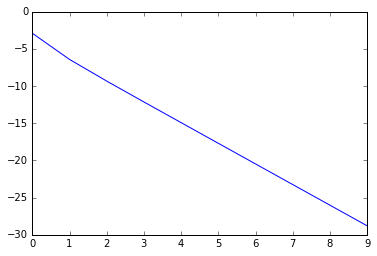

In [4]:
plt.plot(err)

In [5]:
np.polyfit(range(10), err, 1)[0]

-2.8325199980860192

In [6]:
# n = 196 is an estimated min number of regions to obtain 10**-10 error
H = gauss_quad_2(f, 0, 5, 196)

In [7]:
import unittest
tc = unittest.TestCase('__init__')
tc.assertAlmostEqual(I, H, places=10)

In [8]:
# standard normal cdf
from scipy.stats import norm

from numerical.integration import std_norm_cdf

# x < -3
I = norm.cdf(-10)

err = []
for i in range(2):
    e = std_norm_cdf(-10, n=i + 1) - I
    err.append(log(abs(e)))

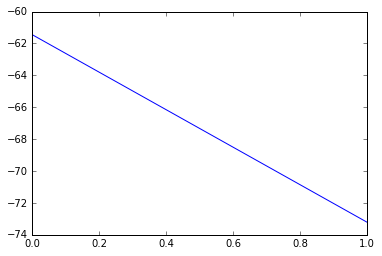

In [9]:
plt.plot(err)

In [10]:
np.polyfit(range(2), err, 1)[0]

-11.761948944061281

In [11]:
# -3 <= x <= 3
I = norm.cdf(0.125)
e = std_norm_cdf(0.125, n=1) - I
print(e)

0.0


In [12]:
# x > 3
I = norm.cdf(100)

err = []
for i in range(2):
    e = std_norm_cdf(100, n=i + 1) - I
    print(e)

7.4162898045e-12
0.0
